<div style="background-color:#262766;" >
<p style="margin: auto; padding: 20px; text-align:center;color:#fff;font-size:22px; ">Détection de Faux Billets
    <br/>~ Analyse Exploratoire ~</p>
</div>

<div style="background:#FFEEDA;padding:10px;">
    <p> <strong>OBJECTIF DE CE NOTEBOOK :</strong>
<br/>Analysez les données de billets, afin de développer un algorithme capable de prédire si un billet est authentique ou non, à partir de ses caractéristiques géométriques. L’analyse repose sur un jeu de données fourni par l’ONCFM, et explore plusieurs méthodes de machine learning supervisées et non supervisées.
    </p>
    <p>Dans cette première partie nous allons analyser les données des billets et compléter les infoirmations absentes à l'aide d'une régression linéaire.</p>
</div>

<div style="background-color:#4c6ab2;" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Étape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="background:#C0DFF4;" >
<h3 style="margin: auto; padding: 20px; color: #0D2E63; ">1.1 - Importation des librairies</h3>
</div>

In [2]:
#Importation de la librairie Pandas
import pandas as pd

#Importation de la librairie Numpy
import numpy as np

In [3]:
#Importation des librairies graphique
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Importation de la librairie Tabulate
from tabulate import tabulate

In [5]:
#Importation libraire statistiques
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
import scipy.stats as stats

<div style="background:#C0DFF4;" >
<h3 style="margin: auto; padding: 20px; color: #0D2E63; ">1.2 - Chargement des fichiers</h3>
</div>

<div style="background:#FFEEDA;padding:10px;">
    <p>Les données sont fournies par l’Organisation nationale de lutte contre le faux-monnayage (ONCFM).
    <br/>L'échantillon de données contient 1000 vrais billets et 500 faux.
    </p>
</div>

In [6]:
#Importation du fichier billets
df_billets = pd.read_csv("data/billets.csv", sep=";")

In [7]:
#Afficher le dataframe
df_billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


<div style="background:#C0DFF4;" >
<h3 style="margin: auto; padding: 20px; color: #0D2E63; ">1.3 - Analyse exploratoire</h3>
</div>

In [7]:
#Fonction d'analyse exploratoire des fichiers
def analyze_columns_line_by_line(df):    
    print("\n📊 **Analyse Exploratoire du DataFrame** 📊\n")
    for col in df.columns:
        print(f"🔹 **Colonne :** {col}")
        print(f"   - Type de données : {df[col].dtype}")
        print(f"   - Valeurs manquantes : {df[col].isnull().sum()}")
        print(f"   - Unique : {df[col].nunique(dropna=True)}")
        print(f"   - Distinct : {(df[col].value_counts() == 1).sum()}")
        print(f"   - Min : {df[col].dropna().min()}")
        print(f"   - Max : {df[col].dropna().max()}")
        print("-" * 50)  # Séparateur visuel entre les colonnes

In [8]:
#Afficher les dimensions du dataset
print("Le dataframe comporte {} observation(s) ou ligne(s)".format(df_billets.shape[0]))
print("Le dataframe comporte {} colonne(s)".format(df_billets.shape[1]))

# Describe
df_billets.describe()

Le dataframe comporte 1500 observation(s) ou ligne(s)
Le dataframe comporte 7 colonne(s)


,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [9]:
# Analyse du dataframe
analyze_columns_line_by_line(df_billets)


📊 **Analyse Exploratoire du DataFrame** 📊

🔹 **Colonne :** is_genuine
   - Type de données : bool
   - Valeurs manquantes : 0
   - Unique : 2
   - Distinct : 0
   - Min : False
   - Max : True
--------------------------------------------------
🔹 **Colonne :** diagonal
   - Type de données : float64
   - Valeurs manquantes : 0
   - Unique : 159
   - Distinct : 26
   - Min : 171.04
   - Max : 173.01
--------------------------------------------------
🔹 **Colonne :** height_left
   - Type de données : float64
   - Valeurs manquantes : 0
   - Unique : 155
   - Distinct : 18
   - Min : 103.14
   - Max : 104.88
--------------------------------------------------
🔹 **Colonne :** height_right
   - Type de données : float64
   - Valeurs manquantes : 0
   - Unique : 170
   - Distinct : 25
   - Min : 102.82
   - Max : 104.95
--------------------------------------------------
🔹 **Colonne :** margin_low
   - Type de données : float64
   - Valeurs manquantes : 37
   - Unique : 285
   - Distinct : 53


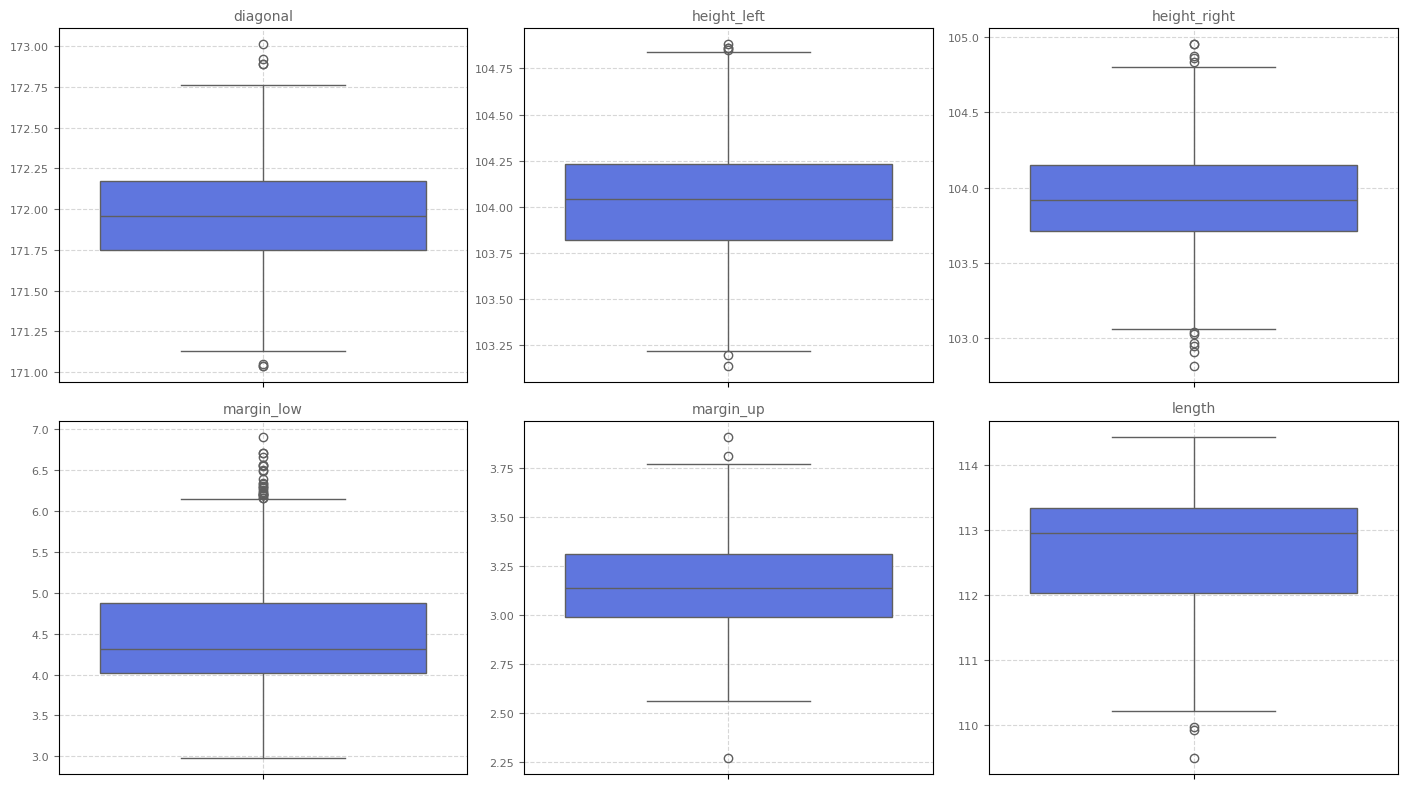

In [10]:
#Représentation graphique des valeurs des variables 
colonnes_numeriques = df_billets.select_dtypes(include='number').columns
nb_colonnes = 3
nb_graphs = len(colonnes_numeriques)
nb_lignes = 2

# Taille de la figure 
fig, axes = plt.subplots(nb_lignes, nb_colonnes, figsize=(14, 4 * nb_lignes))
axes = axes.flatten()

# Tracer chaque boxplot
for i, col in enumerate(colonnes_numeriques):
    sns.boxplot(y=df_billets[col], ax=axes[i], color="#4A69F3")
    axes[i].set_title(f'{col}', fontsize=10, color='#666666')
    axes[i].tick_params(axis='y', labelsize=8, colors='#666666')
    axes[i].grid(True, linestyle='--', alpha=0.5)
    axes[i].set_ylabel("")

# Ajuster les espacements entre les sous-graphes
plt.subplots_adjust(hspace=4, wspace=4)
plt.tight_layout()
plt.show()

In [11]:
#On réencode la colonne is_geniune pour s'assurer d'avoir une variable numérique
#Billets True=1, Billets False=0
df_billets['is_genuine'] = df_billets['is_genuine'].astype(int)

In [12]:
# Vérification Répartition des billets vrais / faux
repartition = df_billets['is_genuine'].value_counts().sort_index()
pourcentages = df_billets['is_genuine'].value_counts(normalize=True).sort_index() * 100

repartition_df = pd.DataFrame({
    'Nombre de billets': repartition,
    'Pourcentage (%)': pourcentages.round(1)
})
repartition_df.index = ['Faux (0)', 'Vrai (1)']
display(repartition_df)

,Nombre de billets,Pourcentage (%)
Faux (0),500,33.3
Vrai (1),1000,66.7


<div style="background:#FFEEDA;padding:10px;">
<strong>Analyse exploratoire – Synthèse</strong>
<ul>
<li>Le jeu de données contient <strong>1500 billets</strong> décrits par <strong>6 caractéristiques géométriques</strong> et une colonne cible <em>'is_genuine'</em> indiquant si le billet est vrai (1) ou faux (0).</li>
<li>La répartition est de : <strong>1000 vrais (66,7%)</strong> et <strong>500 faux (33,3%)</strong>.</li>
<li>Les variables présentent des valeurs numériques cohérentes et comprises dans des plages réalistes. La majorité des variables sont centrées autour de valeurs proches.</li>
    <li>Quelques outliers sont visibles sur les boxplots, notamment pour <em>'margin_low'</em>, mais rien qui ne semble incohérrent.</li>
<li>La colonne <em>'margin_low'</em> présente <strong>des valeurs manquantes</strong>, qui seront comblées par une <strong>régression linéaire</strong> dans l’étape suivante.</li>
    </ul>
</div>

<div style="background-color:#4c6ab2;" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Étape 2 - Régression linéaire</h2>
</div>

<div style="background:#C0DFF4;" >
<h3 style="margin: auto; padding: 20px; color: #0D2E63; ">2.1 - Analyse des corrélations</h3>
</div>

Avant de réaliser notre régression, observons les relations entre nos variables.

In [13]:
#Observation des coefficients de corrélation
df_billets.corr()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.132756,-0.379833,-0.485092,-0.783032,-0.606262,0.849285
diagonal,0.132756,1.000000,0.019472,-0.024492,-0.111534,-0.055649,0.097587
height_left,-0.379833,0.019472,1.000000,0.242279,0.302643,0.246522,-0.320863
height_right,-0.485092,-0.024492,0.242279,1.000000,0.391085,0.307005,-0.401751
margin_low,-0.783032,-0.111534,0.302643,0.391085,1.000000,0.431606,-0.666753
margin_up,-0.606262,-0.055649,0.246522,0.307005,0.431606,1.000000,-0.520575
length,0.849285,0.097587,-0.320863,-0.401751,-0.666753,-0.520575,1.000000


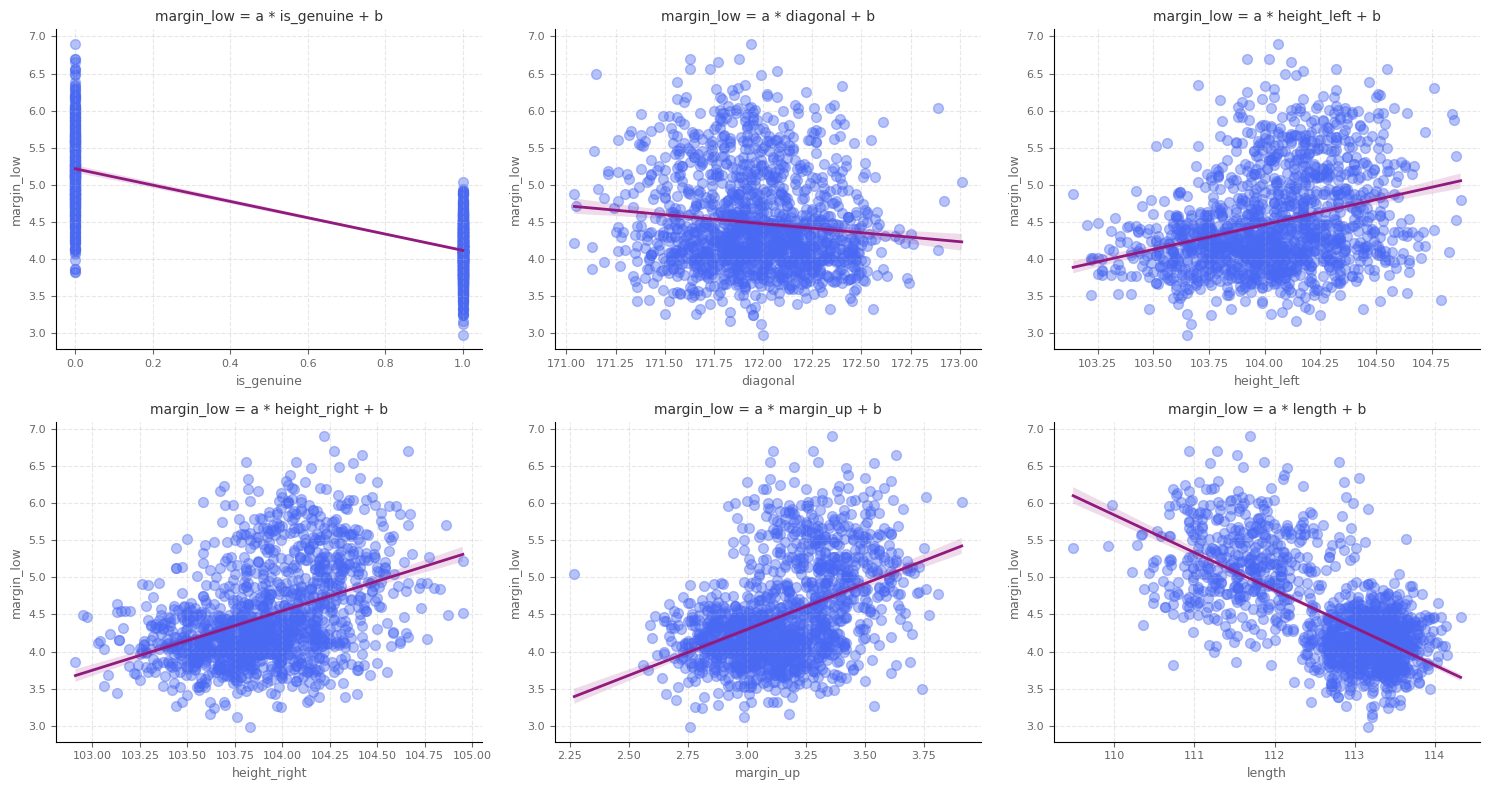

In [14]:
# Projection des Variables prédictives (on exclut margin_low)

# Couleurs 
line_color = "#92197D"
point_color = "#4A69F3"
title_color = "#333333"
label_color = "#666666"

# Variables 
colonnes_exp = [col for col in df_billets.columns if col != 'margin_low']
n_cols = 3
n_vars = len(colonnes_exp)
n_rows = -(-n_vars // n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(colonnes_exp, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.regplot(
        x=df_billets[col], 
        y=df_billets['margin_low'],
        line_kws={"color": line_color, "linewidth": 2},
        scatter_kws={"color": point_color, "s": 50, "alpha": 0.4}
    )
    plt.xlabel(col, fontsize=9, color=label_color)
    plt.ylabel("margin_low", fontsize=9, color=label_color)
    plt.title(f"margin_low = a * {col} + b", fontsize=10, color=title_color)
    plt.tick_params(axis='both', labelsize=8, colors=label_color)
    plt.grid(True, linestyle='--', alpha=0.3)
    sns.despine()

plt.tight_layout()
plt.show()

<div style="background:#FFEEDA;padding:10px;">
    <p>On observe des corrélations positives entre <em>margin_low</em> et les variables <em>height_right</em>, <em>margin_up</em> et <em>height_left</em>. A l'inverse, <em>is_genuine</em> et <em>length</em> présentent des corrélations négatives forte avec <em>margin_low</em>.
      
</p>
    <p>On note également une forte corrélation entre <em>is_genuine</em> et <em>length</em></p>
    <p><strong>Nos observations permettent également de confirmer une relation linéaires entre nos variables, prérequis à notre régression linéaire multiple.</strong></p>
</div>

In [15]:
#Analyse des multicolinéarité : VIF (Facteur d'inflation de la variance)
X_vif = df_billets[['is_genuine','length', 'diagonal', 'height_left', 'height_right', 'margin_up']]

vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("\n Indice de colinéarité (VIF) :")
display(vif_data)


 Indice de colinéarité (VIF) :


,Variable,VIF
0,is_genuine,13.837527
1,length,53703.070865
2,diagonal,170040.956065
3,height_left,119689.924636
4,height_right,112424.973060
5,margin_up,294.507490


La multicolinéarité est extrème sur nos variables. On réduit progressivement les variables, en commençant par celle les plus extrèmes afin de retomber à des indice plus acceptables.

In [16]:
#Analyse des multicolinéarité : VIF (Variance Inflation Factor)
X_vif = df_billets[['is_genuine', 'height_left', 'margin_up']]

vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

display(vif_data)

,Variable,VIF
0,is_genuine,4.643861
1,height_left,332.362211
2,margin_up,293.949093


<div style="background:#FFEEDA;padding:10px;">
    <p>Notre analyse a révélé une <strong>forte multicolinéarité</strong> entre certaines variables explicatives, ce qui peut nuire à la stabilité et à l’interprétabilité de la régression linéaire.
Nous avons donc choisi de <strong>réduire le nombre de variables</strong> utilisées, en conservant uniquement celles les moins redondantes.</p>
   <br/> <em>NB : Des tests ont été menés avec l’ensemble des variables et avec le modèle réduit. Les performances obtenues sont similaires, mais la réduction de la multicolinéarité permet d’obtenir un modèle plus simple et plus robuste.</em>
</div>

<div style="background:#C0DFF4;" >
<h3 style="margin: auto; padding: 20px; color: #0D2E63; ">2.2 - Régression linéaire</h3>
</div>

In [17]:
#On récupère uniquement les lignes avec margin_low connues pour entrainer et tester notre modèle
df_train = df_billets[df_billets['margin_low'].notna()]

Scindons le dataset en un partie entraînement (80%) et une partie test (20%).

In [18]:
#On scinde les données d'entrainement et de test
X = df_train[['is_genuine', 'height_left', 'margin_up']]
y = df_train['margin_low']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [19]:
#Régression linéaire
reg = LinearRegression()

In [20]:
# Entrainons le modele
reg.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred_test = reg.predict(X_test)

In [22]:
# Créer un DataFrame de comparaison pour observer la pertinence des prédictions
df_resultats = pd.DataFrame({
    'margin_low_réel': y_test,
    'margin_low_prédit': y_pred_test
})
df_resultats = df_resultats.round(2)
df_resultats.head()

,margin_low_réel,margin_low_prédit
1208,5.19,5.22
178,4.26,4.10
281,4.18,4.11
561,3.93,4.12
891,4.25,4.05


In [23]:
# Calcul du score R²
r2 = r2_score(y_test, y_pred_test)
print(f"Score R² : {r2:.3f}")

# Calcul RMSE et MAPE
print(f"RMSE: {mean_squared_error(y_test, y_pred_test)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_test)}")

Score R² : 0.674
RMSE: 0.13743698376676067
MAPE: 0.06501716682591181


<div style="background:#FFEEDA;padding:10px;">
    <p>Notre modèle de régression linéaire donne les résultats suivant : 
        <br/>- Score R² : 0.674 - Le modèle explique 67,4 % de la variance de la variable margin_low.
        <br/>- RMSE : 0.137 - Il s'agit de l’écart type des erreurs de prédiction. 
        <br/>- MAPE : 6,5% - Il s'agit de la moyenne d'erreur de notre modèle.
    </p><p><strong>Ces résultats indiquent une bonne capacité prédictive, avec une erreur relative faible. </strong></p>
</div>

<div style="background:#C0DFF4;" >
<h3 style="margin: auto; padding: 20px; color: #0D2E63; ">2.3 - Amélioration de notre Régression linéaire</h3>
</div>

<div style="border: 1px solid #5F8BC8;" >
<h4 style="margin: auto; padding: 20px; color: #5F8BC8; ">2.3.1 - Ajout d'un terme croisé</h4>
</div>

<div style="background:#FFEEDA;padding:10px;">
    <p><strong>Afin d'améliorer notre modèle, nous pouvons évoquer certaines pistes : </strong>
    <br/> <br/>- L'utilisation d'un <strong>terme quadratique</strong>. On observe par exemple une séparation en deux groupes distincts sur la variable lentgh. Mais après vérification cette séparation est catégorielle en relation avec is_geniune et non une relation cournée. L'utiliation d'un terme quadratique ne serait alors pas pertinent.
    <br/> <br/>- L'utilisation d'un <strong>terme croisé</strong>. Il y a une forte corrélation entre is_geniune et lenth qui peut potentiellement améliorer notre modèle. 
    </p>
</div>

In [24]:
# Test de la régression linéaire avec terme croisé
df_croise = df_billets.copy()
df_croise['length_genuine'] = df_croise['length'] * df_croise['is_genuine']

df_croise_train = df_croise[df_croise['margin_low'].notna()]
X_croise = df_croise_train.drop(columns=['margin_low'])
y_croise = df_croise_train['margin_low']

X_train_croise, X_test_croise, y_train_croise, y_test_croise = train_test_split(X_croise, y_croise, test_size=0.2, random_state=42)

# Régression
reg_croise = LinearRegression()
reg_croise.fit(X_train_croise, y_train_croise)
y_pred_croise = reg_croise.predict(X_test_croise)

# Scores
print(f"Score R² : {r2_score(y_test_croise, y_pred_croise):.3f}")
print(f"RMSE: {mean_squared_error(y_test_croise, y_pred_croise)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test_croise, y_pred_croise)}")

Score R² : 0.675
RMSE: 0.136828141408337
MAPE: 0.06487427223012567


<div style="background:#FFEEDA;padding:10px;">
    <p>L'ajout d'un terme croisé n'apporte pas une amélioration significative de notre modèle.
</div>

<div style="border: 1px solid #5F8BC8;" >
<h4 style="margin: auto; padding: 20px; color: #5F8BC8; ">2.3.2 - Influence du random seed</h4>
</div>

<div style="background:#FFEEDA;padding:10px;">
    <p>Afin d’évaluer la robustesse du modèle vis-à-vis de la répartition aléatoire des données entre les jeux d’entraînement et de test, une analyse de sensibilité au paramètre random_state peut être réalisée.</p>
</div>

In [25]:
#Test d'influence du random seed
train_test_ratio = [0.2, 0.4, 0.6, 0.8]
random_seeds = [n for n  in  range(0,200,1)]

In [26]:
# Loop progress
from tqdm import tqdm

scores = []

for ratio in tqdm(train_test_ratio):       
    for seed in random_seeds:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=seed)
        
        reg.fit(X_train, y_train)
        # Prediction sur le test set
        y_pred_test = reg.predict(X_test)

        scores.append({
            'ratio': ratio,
            'seed': seed, 
            'rmse': mean_squared_error(y_test, y_pred_test)
        })
scores = pd.DataFrame(scores)

100%|██████████| 4/4 [00:03<00:00,  1.11it/s]


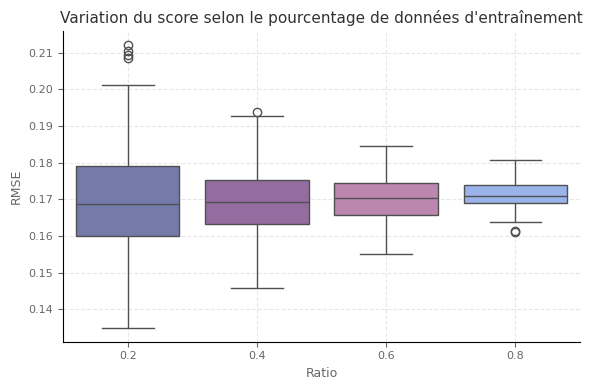

In [27]:
palette = ["#6B74B4", "#9963A9", "#C47DB5", "#8DAEF9"]

plt.figure(figsize=(6, 4))
sns.boxplot(
    x='ratio', 
    y='rmse', 
    hue='ratio',  
    data=scores,
    palette=palette,
    legend=False
)

sns.despine()
plt.title("Variation du score selon le pourcentage de données d'entraînement", fontsize=11, color="#333333")
plt.xlabel("Ratio", fontsize=9, color="#666666")
plt.ylabel("RMSE", fontsize=9, color="#666666")
plt.tick_params(axis='both', labelsize=8, colors="#666666")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [28]:
#Extraction du random state avec le meilleur score
# Extraire uniquement les résultats pour test_size = 0.2 //meilleur rmse
meilleurs_scores = scores[scores['ratio'] == 0.2]

# Trouver le random_state qui donne le plus petit RMSE
best_result = meilleurs_scores.loc[meilleurs_scores['rmse'].idxmin()]
print(f"Meilleur random_state pour test_size=0.2 :\n{best_result}")

Meilleur random_state pour test_size=0.2 :
ratio      0.200000
seed     132.000000
rmse       0.135024
Name: 132, dtype: float64


In [29]:
#Réentrainement du modèle avec random state =132
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=132)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_test = reg.predict(X_test)

In [30]:
# Calcul du score R²
r2 = r2_score(y_test, y_pred_test)
print(f"Score R² : {r2:.3f}")

# Calcul RMSE et MAPE
print(f"RMSE: {mean_squared_error(y_test, y_pred_test)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_test)}")

Score R² : 0.682
RMSE: 0.13502365195116608
MAPE: 0.0625731299112731


<div style="background:#FFEEDA;padding:10px;">
    <p>La sélection d'un random state avec un meilleur résultat permet d'améliorer légèrement notre modèle : 
        <br/>- Score R² : 0.682 - Le modèle explique 68,2 % de la variance de la variable margin_low.
        <br/>- RMSE : 0.135 - Il s'agit de l’écart type des erreurs de prédiction. 
        <br/>- MAPE : 6,2% - Il s'agit de la moyenne d'erreur de notre modèle.
    </p>
    <p><strong>Notre modèle capte une part importante des tendances, sans être parfait, mais suffisamment bon pour combler nos valeurs manquantes avec une précision plus importante qu'une simple moyenne.</strong></p>
</div>

<div style="background:#C0DFF4;" >
<h3 style="margin: auto; padding: 20px; color: #0D2E63; ">2.4 - Vérification des hypothèses de validité du modèle</h3>
</div>

<div style="background:#FFEEDA;padding:10px;">
    <p>Avant de valider et d'utiliser notre modèle de régression linéaire, il est important de vérifier que certaines <strong>hypothèses théoriques sont respectées</strong>, afin de s’assurer de la fiabilité, de la stabilité et de la robustesse du modèle.
<br/><br/>Nous allons donc analyser les résidus du modèle pour vérifier :
<br/>- la <strong>linéarité des relations</strong>,
<br/>- la constance de la variance des erreurs, <strong>l'homoscédasticité</strong>,
<br/>- la <strong>normalité des résidus</strong>,
<br/>- et <strong>l’indépendance des erreurs</strong>.
<br/><br/>La vérification de la <strong>multicolinéarité</strong> entre les variables explicatives a été réalisée en amont, à l’aide des facteurs d’inflation de variance (VIF). Les variables fortement redondantes ont été retirées du modèle pour améliorer sa stabilité.
</p>
</div>

<div style="border: 1px solid #5F8BC8;" >
<h4 style="margin: auto; padding: 20px; color: #5F8BC8; ">2.4.1 - Linéarité et Homoscédasticité</h4>
</div>

Une première vérification de la linéarité a été réalisée à l’aide de scatterplots montrant la relation entre margin_low et chaque variable explicative.
Une seconde vérification est faite à partir des résidus du modèle, afin d’évaluer la linéarité globale dans le contexte multivarié.

On vérifie également que les erreurs du modèle (résidus) ont une dispersion constante, quelle que soit la valeur prédite. Une dispersion homogène valide l’hypothèse d’homoscédasticité.

In [31]:
# Calcul des résidus (erreurs)
residuals = y_test - y_pred_test

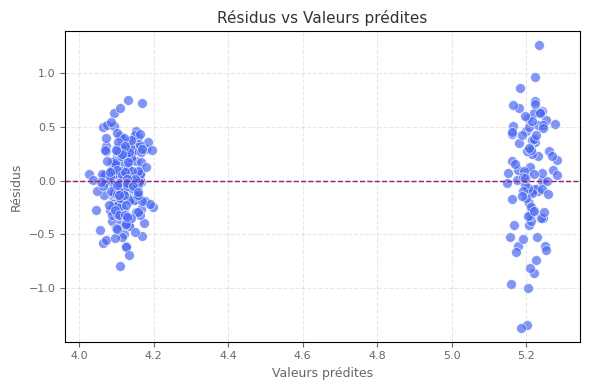

In [32]:
# Graphique

point_color = "#4A69F3"      
line_color = "#92197D"      
title_color = "#333333"   
label_color = "#666666"      

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred_test, y=residuals, color=point_color, s=50, alpha=0.7)
plt.axhline(0, color=line_color, linestyle='--', linewidth=1)
plt.title("Résidus vs Valeurs prédites", fontsize=11, color=title_color)
plt.xlabel("Valeurs prédites", fontsize=9, color=label_color)
plt.ylabel("Résidus", fontsize=9, color=label_color)
plt.tick_params(axis='both', labelsize=8, colors=label_color)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

<div style="background:#FFEEDA;padding:10px;">
    <p>Le graphique des résidus ne montre pas de motif courbe. Les erreurs sont bien réparties autour de zéro, malgré une concentration autour de deux noeuds, liées à notre répartition entre vrai et faux billets.
        <br/><strong>L’hypothèse de linéarité peut être considérée comme respectée.</strong>
</p>
        <p>L’observation du nuage de points ne montre pas de motif en cône ni de variation importante de la dispersion des résidus selon les valeurs prédites.  
<br/><strong>L’hypothèse d’homoscédasticité peut donc être considérée comme respectée.</strong></p>
</div>

<div style="border: 1px solid #5F8BC8;" >
<h4 style="margin: auto; padding: 20px; color: #5F8BC8; ">2.4.2 - Normalité des résidus</h4>
</div>

Les résidus du modèle doivent suivre une distribution normale (en forme de cloche).

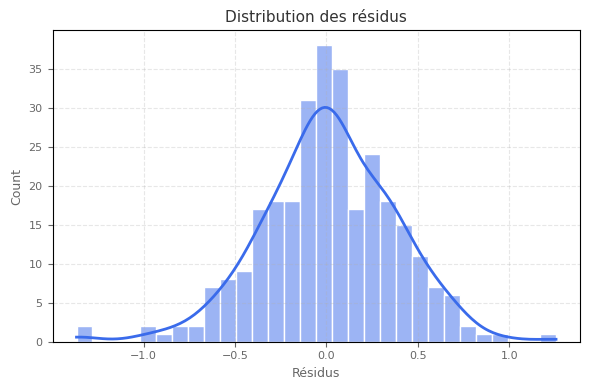

In [33]:
#histogramme des résidus 

# Couleurs 
bar_color = "#3A6BEB"
bar_edgecolor = "white"
title_color = "#333333"
label_color = "#666666"

plt.figure(figsize=(6, 4))
sns.histplot(
    residuals, 
    kde=True, 
    bins=30, 
    color=bar_color, 
    edgecolor=bar_edgecolor, 
    line_kws={"linewidth": 2}
)
plt.title("Distribution des résidus", fontsize=11, color=title_color)
plt.xlabel("Résidus", fontsize=9, color=label_color)
plt.ylabel("Count", fontsize=9, color=label_color)
plt.tick_params(axis='both', labelsize=8, colors=label_color)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

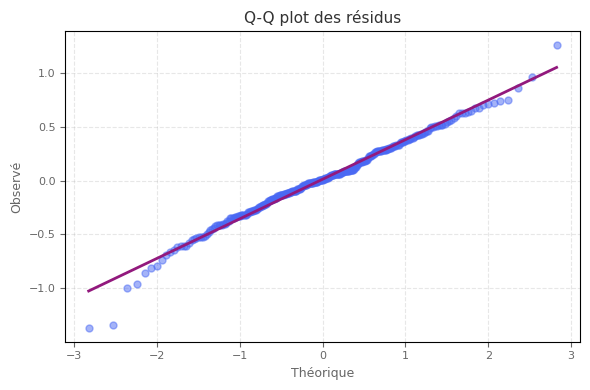

In [34]:
# Q-Q plot

# Couleurs
title_color = "#333333"
label_color = "#666666"
line_color = "#92197D"   
point_color = "#4A69F3"   

# Création du Q-Q plot
plt.figure(figsize=(6, 4))
ax = plt.gca()
res = stats.probplot(residuals, dist="norm", plot=ax)

line = ax.get_lines()[1]   # Ligne de tendance
points = ax.get_lines()[0] # Points

# styles
line.set_color(line_color)
line.set_linewidth(2)
points.set_color(point_color)
points.set_marker('o')
points.set_markersize(5)
points.set_alpha(0.5)

# Mise en forme
plt.title("Q-Q plot des résidus", fontsize=11, color=title_color)
plt.xlabel("Théorique", fontsize=9, color=label_color)
plt.ylabel("Observé", fontsize=9, color=label_color)
plt.tick_params(axis='both', labelsize=8, colors=label_color)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [35]:
# Test de Shapiro-Wilk
stat, p_value = shapiro(residuals)

print(f"Test de Shapiro-Wilk : p-value = {p_value:.4f}")
if p_value > 0.05:
    print("Les résidus suivent une distribution normale (hypothèse non rejetée).")
else:
    print("Les résidus ne semblent pas suivre une distribution normale (hypothèse rejetée).")

Test de Shapiro-Wilk : p-value = 0.0235
Les résidus ne semblent pas suivre une distribution normale (hypothèse rejetée).


<div style="background:#FFEEDA;padding:10px;">
    <p>
- L'histogramme des résidus montre une distribution globalement en cloche, centrée sur 0, ce qui suggère une tendance à la normalité.  
<br/>- Le Q-Q plot montre que la majorité des résidus suit une loi normale, avec un bon alignement sur la diagonale, mais avec <br/>- Le test statistique de Shapiro-Wilk rejette cependant l'hypothèse de normalité.       
    </p>
<p><strong>Bien que le test statistique rejette légèrement la normalité, la forme globale des résidus est suffisamment proche d’une distribution normale pour que cela ne compromette pas l’objectif prédictif de ce modèle.</strong></p>
</div>

<div style="border: 1px solid #5F8BC8;" >
<h4 style="margin: auto; padding: 20px; color: #5F8BC8; ">2.4.3 - Indépendance des erreurs</h4>
</div>

Les erreurs du modèle ne doivent pas être dépendante. L'observations des résidus ne doit pas montrer de schéma particulier.

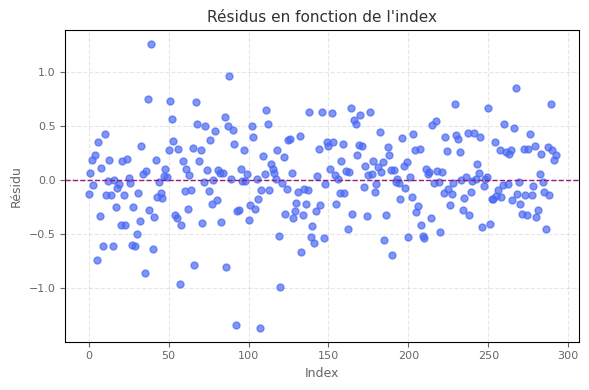

In [36]:
#Graphique des résidus du modèle

# Couleurs
point_color = "#4A69F3"
line_color = "#92197D"
title_color = "#333333"
label_color = "#666666"

plt.figure(figsize=(6, 4))
plt.plot(residuals.reset_index(drop=True), marker='o', linestyle='', color=point_color, markersize=5, alpha=0.7)
plt.axhline(0, color=line_color, linestyle='--', linewidth=1)
plt.title("Résidus en fonction de l'index", fontsize=11, color=title_color)
plt.xlabel("Index", fontsize=9, color=label_color)
plt.ylabel("Résidu", fontsize=9, color=label_color)
plt.tick_params(axis='both', labelsize=8, colors=label_color)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

<div style="background:#FFEEDA;padding:10px;">
    <p>Le graphique des résidus en fonction de leur index ne montre aucun motif particulier. <br/>
Les erreurs sont réparties de façon aléatoire autour de 0, ce qui confirme que l’hypothèse d’indépendance des erreurs est respectée dans notre modèle.</p>
</div>

<div style="background:#C0DFF4;" >
<h3 style="margin: auto; padding: 20px; color: #0D2E63; ">2.4 - Ajout des données manquantes</h3>
</div>

<div style="background:#FFEEDA;padding:10px;">
    <p>La régression linéaire développée présente de bonnes performances prédictives et respecte globalement les hypothèses théoriques. 
<br/><strong>Elle peut donc être utilisée en toute confiance pour estimer les valeurs manquantes de la variable <em>'margin_low'</em>.</strong></p>
</div>

In [37]:
# Récupérer les lignes avec margin_low manquant
df_pred = df_billets[df_billets['margin_low'].isna()].copy()

# Extraire les variables prédictives utilisées dans le modèle final
X_pred = df_pred[['is_genuine', 'height_left', 'margin_up']]

# Prédire les valeurs manquantes avec le modèle final
predicted_margin_low = reg.predict(X_pred)
predicted_margin_low = predicted_margin_low.round(2)

# Ajouter les valeurs prédites dans df_pred
df_pred['margin_low'] = predicted_margin_low

In [38]:
# Intégrer les valeurs prédites dans le DataFrame billets
df_billets.loc[df_pred.index, 'margin_low'] = df_pred['margin_low']

In [39]:
#Exportation des données complétées
df_billets.to_csv("billets_complet.csv", sep=";", index=False)